# Capstone final Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Accidents

In [2]:
accidents = pd.read_csv("Accident_information.csv")
accidents.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,None,2005-01-04,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,None,2005-01-05,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,None,30.0,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,None,2005-01-06,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,None,2005-01-07,Friday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,None,2005-01-10,Monday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,21:13,Urban,Fine no high winds,2005,No


In [3]:
print('Records : ', accidents.shape[0], '\nColumns : ', accidents.shape[1])

Records :  2047256 
Columns :  34


## Vehicles

In [4]:
vehicles = pd.read_csv("Vehicle_Information.csv",engine='python')
print(vehicles.shape)

(2177205, 24)


In [5]:
vehicles.head()

,Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,...,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year
0,200401BS00001,26 - 35,3.0,Urban area,4.0,1588.0,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,Data missing or out of range,Front,2004
1,200401BS00002,26 - 35,NaN,Urban area,3.0,NaN,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,109,Data missing or out of range,Front,2004
2,200401BS00003,26 - 35,4.0,Data missing or out of range,NaN,998.0,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Turning right,1,109,Data missing or out of range,Front,2004
3,200401BS00003,66 - 75,NaN,Data missing or out of range,NaN,NaN,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,Data missing or out of range,Front,2004
4,200401BS00004,26 - 35,1.0,Urban area,4.0,124.0,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle 125cc and under,Data missing or out of range,Front,2004


In [6]:
accidents['Date']= pd.to_datetime(accidents['Date'], format="%Y-%m-%d")

In [7]:
accidents.iloc[:, 5:13].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2047256 entries, 0 to 2047255
Data columns (total 8 columns):
 #   Column                                       Dtype         
---  ------                                       -----         
 0   Accident_Severity                            object        
 1   Carriageway_Hazards                          object        
 2   Date                                         datetime64[ns]
 3   Day_of_Week                                  object        
 4   Did_Police_Officer_Attend_Scene_of_Accident  float64       
 5   Junction_Control                             object        
 6   Junction_Detail                              object        
 7   Latitude                                     float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 125.0+ MB


Morning Rush from 5am to 10am
Office Hours from 10am to 3pm (or: 10:00 - 15:00)
Afternoon Rush from 3pm to 7pm (or: 15:00 - 19:00)
Evening from 7pm to 11pm (or: 19:00 - 23:00)
Night from 11pm to 5am (or: 23:00 - 05:00)

In [8]:
# slice first and second string from time column
accidents['Hour'] = accidents['Time'].str[0:2]

# convert new column to numeric datetype
accidents['Hour'] = pd.to_numeric(accidents['Hour'])

# drop null values in our new column
accidents = accidents.dropna(subset=['Hour'])

# cast to integer values
accidents['Hour'] = accidents['Hour'].astype('int')


In [9]:
# define a function that turns the hours into daytime groups
def when_was_it(hour):
    if hour >= 5 and hour < 10:
        return "morning rush (5-10)"
    elif hour >= 10 and hour < 15:
        return "office hours (10-15)"
    elif hour >= 15 and hour < 19:
        return "afternoon rush (15-19)"
    elif hour >= 19 and hour < 23:
        return "evening (19-23)"
    else:
        return "night (23-5)"


In [10]:
# apply thus function to our temporary hour column
accidents['Daytime'] = accidents['Hour'].apply(when_was_it)
accidents[['Time', 'Hour', 'Daytime']].head(8)

,Time,Hour,Daytime
0,17:42,17,afternoon rush (15-19)
1,17:36,17,afternoon rush (15-19)
2,00:15,0,night (23-5)
3,10:35,10,office hours (10-15)
4,21:13,21,evening (19-23)
5,12:40,12,office hours (10-15)
6,20:40,20,evening (19-23)
7,17:35,17,afternoon rush (15-19)


## 2.2. Handling Missing Values

In [11]:
print('Proportion of Missing Values in Accidents Table:', 
      round(accidents.isna().sum().sum()/len(accidents),3), '%')

Proportion of Missing Values in Accidents Table: 0.495 %


In [12]:
print('Proportion of Missing Values in Vehicles Table:', 
      round(vehicles.isna().sum().sum()/len(vehicles),3), '%')

Proportion of Missing Values in Vehicles Table: 0.938 %


# 3. Exploratory Data Analysis (EDA)

## 3.1. Main Characteristics of Accidents

**Has the number of accidents increased or decreased over the last few years?**

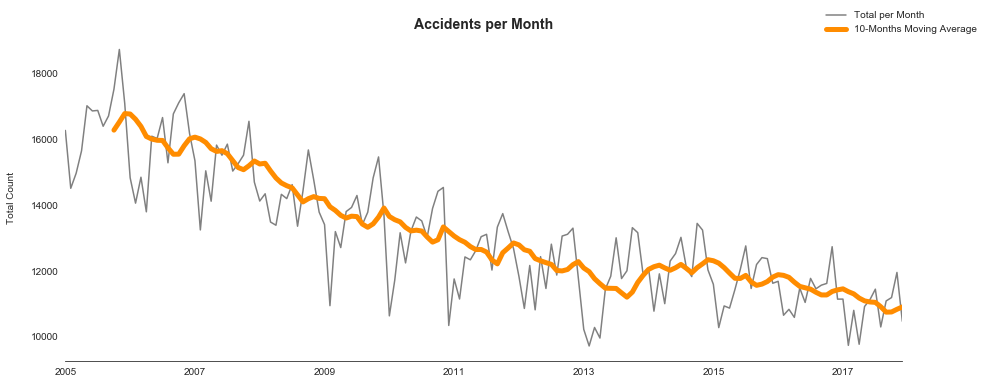

In [13]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(15,6))

# plot
accidents.set_index('Date').resample('M').size().plot(label='Total per Month', color='grey', ax=ax)
accidents.set_index('Date').resample('M').size().rolling(window=10).mean()\
                           .plot(color='darkorange', linewidth=5, label='10-Months Moving Average', ax=ax)

ax.set_title('Accidents per Month', fontsize=14, fontweight='bold')
ax.set(ylabel='Total Count\n', xlabel='')
ax.legend(bbox_to_anchor=(1.1, 1.1), frameon=False)

# remove all spines
sns.despine(ax=ax, top=True, right=True, left=True, bottom=False);

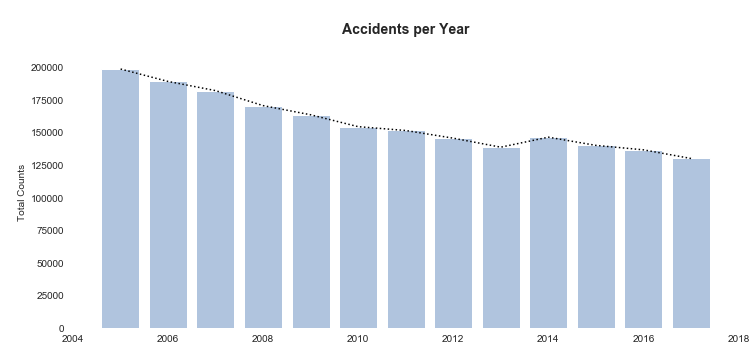

In [14]:
yearly_count = accidents['Date'].dt.year.value_counts().sort_index(ascending=False)

# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(12,5))

# plot
ax.bar(yearly_count.index, yearly_count.values, color='lightsteelblue')
ax.plot(yearly_count, linestyle=':', color='black')
ax.set_title('\nAccidents per Year\n', fontsize=14, fontweight='bold')
ax.set(ylabel='\nTotal Counts')

# remove all spines
sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);


On which weekdays are accidents most likely to be caused?

- Preparing dataframe that calculates average accidents per weekday:

In [15]:
weekday_counts = pd.DataFrame(accidents.set_index('Date').resample('1d')['Accident_Index'].size().reset_index())
weekday_counts.columns = ['Date', 'Count']
#weekday_counts

weekday =  weekday_counts['Date'].dt.strftime("%A")
#weekday

weekday_averages = pd.DataFrame(weekday_counts.groupby(weekday)['Count'].mean().reset_index())
weekday_averages.columns = ['Weekday', 'Average_Accidents']
weekday_averages.set_index('Weekday', inplace=True)
weekday_averages

,Average_Accidents
Weekday,
Friday,494.345133
Monday,428.410029
Saturday,402.254786
Sunday,331.821797
Thursday,454.595870
Tuesday,451.721239
Wednesday,455.089971


- Plotting this dataframe:

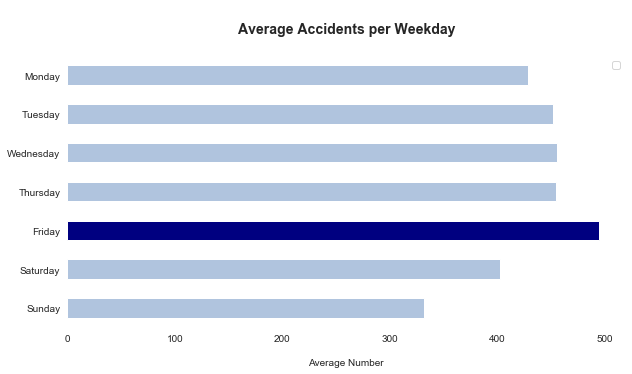

In [16]:
# reorder the weekdays beginning with Monday (backwards because of printing behavior!)
days = ['Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday']

# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,5))
colors=['lightsteelblue', 'lightsteelblue', 'navy', 'lightsteelblue', 
        'lightsteelblue', 'lightsteelblue', 'lightsteelblue']

# plot
weekday_averages.reindex(days).plot(kind='barh', ax=ax, color=[colors])
ax.set_title('\nAverage Accidents per Weekday\n', fontsize=14, fontweight='bold')
ax.set(xlabel='\nAverage Number', ylabel='')
ax.legend('')

# remove all spines
sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);

- Preparing another dataframe by weekday and year:

In [ ]:
weekday = accidents['Date'].dt.strftime("%A")
year    = accidents['Date'].dt.year

accident_table = accidents.groupby([year, weekday]).size()
accident_table = accident_table.rename_axis(['Year', 'Weekday'])\
                               .unstack('Weekday')\
                               .reindex(columns=days)
accident_table

- Plotting this second dataframe:


In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(accident_table, cmap='Reds')
plt.title('\nAccidents by Years and Weekdays\n', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('');


**How are accidents related to weather conditions?**

In [ ]:
accidents.Weather_Conditions.value_counts(normalize=True)

As most of the days the Weather_Condition is "fine" (=1), most accidents will likely to be happen then.

**What percentage of each category of accident severity do we have?**

In [ ]:
accidents.Accident_Severity.value_counts()

In [ ]:
# assign the data
fatal   = accidents.Accident_Severity.value_counts()['Fatal']
serious = accidents.Accident_Severity.value_counts()['Serious']
slight  = accidents.Accident_Severity.value_counts()['Slight']

names = ['Fatal Accidents','Serious Accidents', 'Slight Accidents']
size  = [fatal, serious, slight]
#explode = (0.2, 0, 0)

# create a pie chart
plt.pie(x=size, labels=names, colors=['red', 'darkorange', 'silver'], 
        autopct='%1.2f%%', pctdistance=0.6, textprops=dict(fontweight='bold'),
        wedgeprops={'linewidth':7, 'edgecolor':'white'})

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(8,8)
fig.gca().add_artist(my_circle)
plt.title('\nAccident Severity: Share in % (2013-2017)', fontsize=14, fontweight='bold')
plt.show()

**How has the number of fatalities developed over the years?**

In [ ]:
# set the criterium to slice the fatalaties
criteria = accidents['Accident_Severity']=='Fatal'
# create a new dataframe
weekly_fatalities = accidents.loc[criteria].set_index('Date').sort_index().resample('W').size()

# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(14,6))

# plot
weekly_fatalities.plot(label='Total Fatalities per Month', color='grey', ax=ax)
plt.fill_between(x=weekly_fatalities.index, y1=weekly_fatalities.values, color='grey', alpha=0.3)
weekly_fatalities.rolling(window=10).mean()\
                           .plot(color='darkorange', linewidth=5, label='10-Months Moving Average', ax=ax)

ax.set_title('\nFatalities', fontsize=14, fontweight='bold')
ax.set(ylabel='\nTotal Count', xlabel='')
ax.legend(bbox_to_anchor=(1.2, 1.1), frameon=False)

# remove all spines
sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);


**Is the share of fatal accidents increasing or decreasing?**

In [ ]:
sub_df = accidents[['Date', 'Accident_Index', 'Accident_Severity']]

# pull out the year
year = sub_df['Date'].dt.year
week = sub_df['Date'].dt.week

# groupby year and severities
count_of_fatalities = sub_df.set_index('Date').groupby([pd.Grouper(freq='W'), 'Accident_Severity']).size()

# build a nice table
fatalities_table = count_of_fatalities.rename_axis(['Week', 'Accident_Severity'])\
                                      .unstack('Accident_Severity')\
                                      .rename({1:'fatal', 2:'serious', 3:'slight'}, axis='columns')
fatalities_table.head()

In [ ]:
fatalities_table['sum'] = fatalities_table.sum(axis=1)
fatalities_table = fatalities_table.join(fatalities_table.div(fatalities_table['sum'], axis=0), rsuffix='_percentage')
fatalities_table.head()


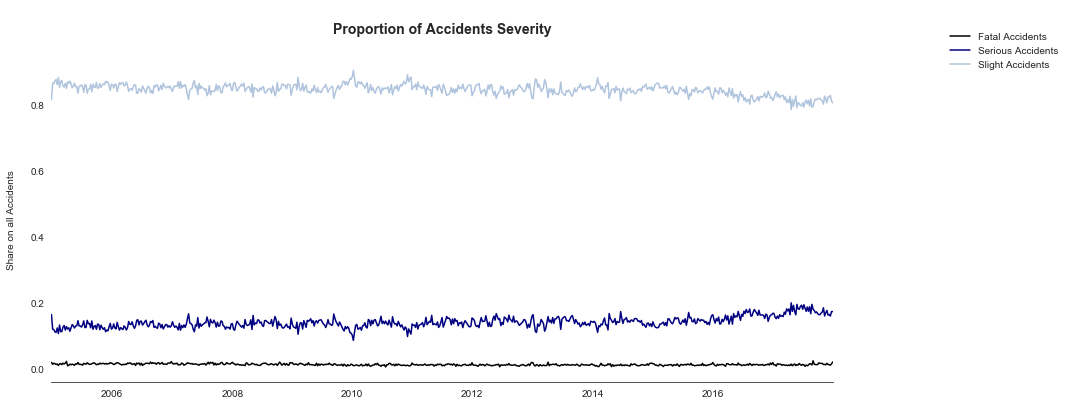

In [37]:
# prepare data
sub_df = fatalities_table[['Fatal_percentage', 'Serious_percentage', 'Slight_percentage']]

# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(14,6))
colors=['black', 'navy', 'lightsteelblue']

# plot
sub_df.plot(color=colors, ax=ax)
ax.set_title('\nProportion of Accidents Severity\n', fontsize=14, fontweight='bold')
ax.set(ylabel='Share on all Accidents\n', xlabel='')
ax.legend(labels=['Fatal Accidents', 'Serious Accidents', 'Slight Accidents'], 
          bbox_to_anchor=(1.3, 1.1), frameon=False)

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=False);


The trend for fatal accidents seems to stagnate.

**How are accidents distributed throughout the day?**

- Distribution of Hours

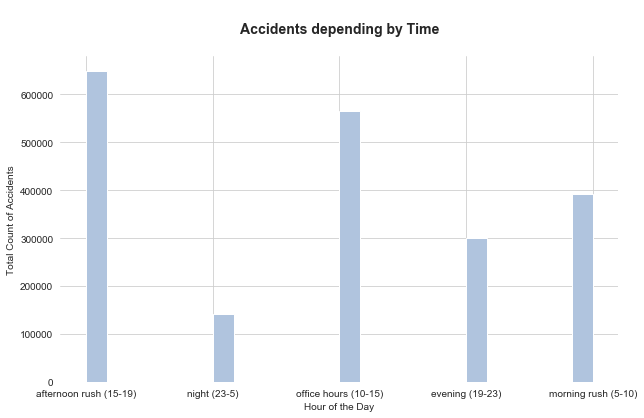

In [48]:
# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,6))

# plot
accidents.Daytime.hist(bins=24, ax=ax, color='lightsteelblue')
ax.set_title('\nAccidents depending by Time\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Hour of the Day', ylabel='Total Count of Accidents')

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=True);

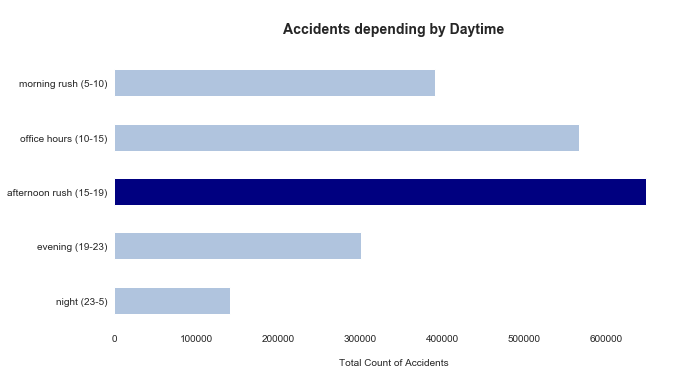

In [51]:
# prepare dataframe
order = ['night (23-5)', 'evening (19-23)', 'afternoon rush (15-19)', 'office hours (10-15)', 'morning rush (5-10)']
df_sub = accidents.groupby('Daytime').size().reindex(order)

# prepare barplot
fig, ax = plt.subplots(figsize=(10, 5))
colors = ['lightsteelblue', 'lightsteelblue', 'navy', 'lightsteelblue', 'lightsteelblue']

# plot
df_sub.plot(kind='barh', ax=ax, color=colors)
ax.set_title('\nAccidents depending by Daytime\n', fontsize=14, fontweight='bold')
ax.set(xlabel='\nTotal Count of Accidents', ylabel='')

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=True);

- Share of Accident Severity by Daytime

In [52]:
# prepare dataframe with simple counts
counts = accidents.groupby(['Daytime', 'Accident_Severity']).size()

counts = counts.rename_axis(['Daytime', 'Accident_Severity'])\
                                .unstack('Accident_Severity')\
                                .rename({1:'fatal', 2:'serious', 3:'slight'}, axis='columns')
counts

Accident_Severity,Fatal,Serious,Slight
Daytime,,,
afternoon rush (15-19),6545,89651,552154
evening (19-23),4898,47268,248457
morning rush (5-10),4169,48807,338083
night (23-5),4336,26853,109697
office hours (10-15),6419,73732,486031


In [53]:
# prepare dataframe with shares
counts['sum'] = counts.sum(axis=1)
counts = counts.join(counts.div(counts['sum'], axis=0), rsuffix=' in %')
counts_share = counts.drop(columns=['Fatal', 'Serious', 'Slight', 'sum', 'sum in %'], axis=1)
counts_share

Accident_Severity,Fatal in %,Serious in %,Slight in %
Daytime,,,
afternoon rush (15-19),0.010095,0.138276,0.851630
evening (19-23),0.016293,0.157233,0.826474
morning rush (5-10),0.010661,0.124807,0.864532
night (23-5),0.030777,0.190601,0.778622
office hours (10-15),0.011337,0.130227,0.858436


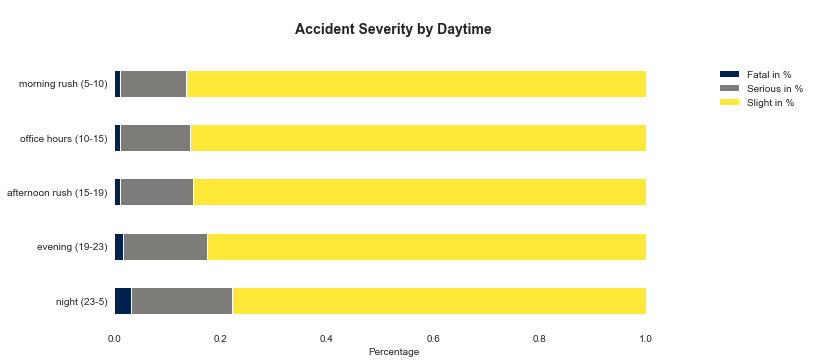

In [54]:
# prepare barplot
fig, ax = plt.subplots(figsize=(10, 5))

# plot
counts_share.reindex(order).plot(kind='barh', ax=ax, stacked=True, cmap='cividis')
ax.set_title('\nAccident Severity by Daytime\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Percentage', ylabel='')
ax.legend(bbox_to_anchor=(1.25, 0.98), frameon=False)

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=True);


## 3.2. Main Characteristics of Vehicles

**What are the age and gender of the drivers who cause an accident?**

In [56]:
vehicles.Sex_of_Driver.value_counts(normalize=True)

Male                            0.674296
Female                          0.290742
Not known                       0.034931
Data missing or out of range    0.000031
Name: Sex_of_Driver, dtype: float64

We'll have to keep in mind that two-thirds of the drivers are male --> imbalanced classes!


In [57]:
# create a new dataframe
drivers = vehicles.groupby(['Age_Band_of_Driver', 'Sex_of_Driver']).size().reset_index()

# drop the values that have no value
drivers.drop(drivers[(drivers['Age_Band_of_Driver'] == 'Data missing or out of range') | \
                     (drivers['Sex_of_Driver'] == 'Not known') | \
                     (drivers['Sex_of_Driver'] == 'Data missing or out of range')]\
                     .index, axis=0, inplace=True)
# rename the columns
drivers.columns = ['Age_Band_of_Driver', 'Sex_of_Driver', 'Count']
drivers


,Age_Band_of_Driver,Sex_of_Driver,Count
0,0 - 5,Female,27
1,0 - 5,Male,94
3,11 - 15,Female,399
4,11 - 15,Male,3254
6,16 - 20,Female,53326
7,16 - 20,Male,122115
10,21 - 25,Female,79778
11,21 - 25,Male,158333
14,26 - 35,Female,141470
15,26 - 35,Male,306282


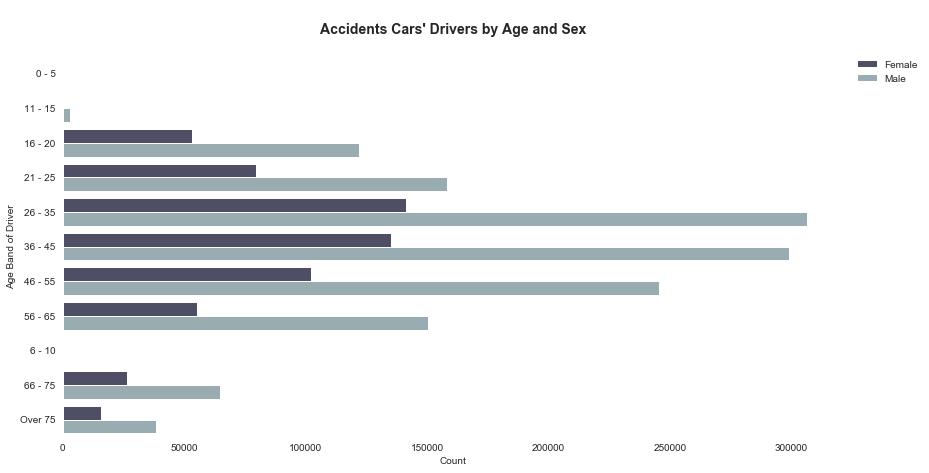

In [58]:
# seaborn barplot
fig, ax = plt.subplots(figsize=(14, 7))
sns.barplot(y='Age_Band_of_Driver', x='Count', hue='Sex_of_Driver', data=drivers, palette='bone')
ax.set_title('\nAccidents Cars\' Drivers by Age and Sex\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Count', ylabel='Age Band of Driver')
ax.legend(bbox_to_anchor=(1.1, 1.), borderaxespad=0., frameon=False)

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=True);

**Which type of manoeuvre is often involved in accidents?**

In [60]:
# prepare dataframe
df_plot = vehicles.groupby('Vehicle_Manoeuvre').size()\
                                                .reset_index(name='counts')\
                                                    .sort_values(by='counts', ascending=False)
                                                        
df_plot = df_plot[df_plot.counts > 80000]
df_plot

,Vehicle_Manoeuvre,counts
4,Going ahead other,994636
14,Turning right,216201
12,Slowing or stopping,177548
16,Waiting to go - held up,155643
5,Going ahead right-hand bend,90893
10,Parked,88354
6,Moving off,87295


In [65]:
# library for plooting a tree map
import squarify

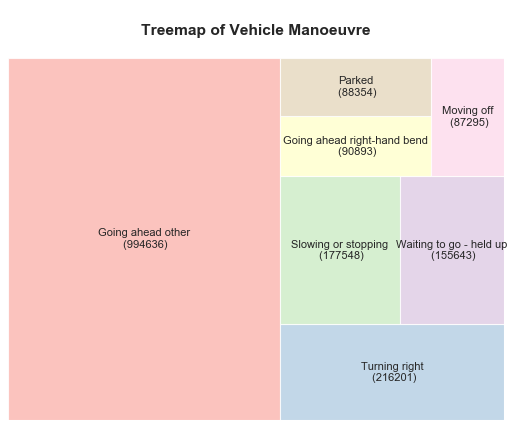

In [66]:
# prepare plot
labels = df_plot.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df_plot['counts'].values.tolist()
colors = [plt.cm.Pastel1(i/float(len(labels))) for i in range(len(labels))]

# plot
plt.figure(figsize=(8,6), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('\nTreemap of Vehicle Manoeuvre\n', fontsize=14, fontweight='bold')
plt.axis('off')
plt.show()
